## W jaki sposób reprezentować grafy?

![image.png](images/adjacency_matrix_permutations.png)

In [1]:
!python --version
!pip3.7 list

Python 3.7.9
Package               Version
--------------------- -----------
absl-py               2.1.0
aiofiles              22.1.0
aiosqlite             0.19.0
anyio                 3.7.1
argon2-cffi           23.1.0
argon2-cffi-bindings  21.2.0
astor                 0.8.1
attrs                 23.2.0
Babel                 2.14.0
backcall              0.2.0
beautifulsoup4        4.12.3
bleach                6.0.0
certifi               2024.6.2
cffi                  1.15.1
charset-normalizer    3.3.2
colorama              0.4.6
cycler                0.11.0
debugpy               1.7.0
decorator             5.1.1
defusedxml            0.7.1
entrypoints           0.4
exceptiongroup        1.2.1
fastjsonschema        2.20.0
fonttools             4.38.0
gast                  0.2.2
google-pasta          0.2.0
grpcio                1.62.2
h5py                  3.8.0
idna                  3.7
importlib-metadata    6.7.0
importlib-resources   5.12.0
ipykernel             6.16.2
ipython       

You should consider upgrading via the 'e:\ml\net2vec\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [2]:
#wyłączenie ostrzerzeń tensorflow
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

## Jak generowany jest dataset oraz co liczy model.

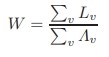 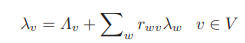 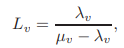

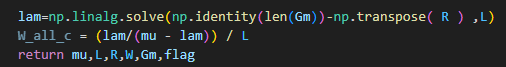

In [3]:
import tensorflow as tf
import numpy as np
import datetime

import mpnn.graph_nn as gnn
import matplotlib.pyplot as plt
%matplotlib inline

args = gnn.args

Using GRU architecture for upadate layer


In [4]:
# Utowrzenie próbek Barabasi-Albert, n = 40
!python ./mpnn/samples.py -N 10000 -o eval.tfrecords -g ba -n 40
args.eval = 'eval.tfrecords'

2024-06-19 16:32:59.227609 Random response: 724151
2024-06-19 16:32:59.229636 generated 0 samples.
2024-06-19 16:33:00.395430 generated 500 samples.
2024-06-19 16:33:01.511807 generated 1000 samples.
2024-06-19 16:33:02.640126 generated 1500 samples.
2024-06-19 16:33:03.843484 generated 2000 samples.
2024-06-19 16:33:05.065505 generated 2500 samples.
2024-06-19 16:33:06.152789 generated 3000 samples.
2024-06-19 16:33:07.181628 generated 3500 samples.
2024-06-19 16:33:08.229147 generated 4000 samples.
2024-06-19 16:33:09.255064 generated 4500 samples.
2024-06-19 16:33:10.319501 generated 5000 samples.
2024-06-19 16:33:11.426612 generated 5500 samples.
2024-06-19 16:33:12.492545 generated 6000 samples.
2024-06-19 16:33:13.517630 generated 6500 samples.
2024-06-19 16:33:14.530768 generated 7000 samples.
2024-06-19 16:33:15.590778 generated 7500 samples.
2024-06-19 16:33:16.620025 generated 8000 samples.
2024-06-19 16:33:17.835204 generated 8500 samples.
2024-06-19 16:33:18.910769 generate

In [5]:
# Utowrzenie próbek Barabasi-Albert, n = 80
!python ./mpnn/samples.py -N 10000 -o eval80.tfrecords -g ba -n 80
args.eval = 'eval80.tfrecords'

2024-06-19 16:33:31.429135 Random response: 457459
2024-06-19 16:33:31.430132 generated 0 samples.
2024-06-19 16:33:34.529956 generated 500 samples.
2024-06-19 16:33:37.307383 generated 1000 samples.
2024-06-19 16:33:39.756868 generated 1500 samples.
2024-06-19 16:33:42.307951 generated 2000 samples.
2024-06-19 16:33:44.883757 generated 2500 samples.
2024-06-19 16:33:47.769882 generated 3000 samples.
2024-06-19 16:33:50.306100 generated 3500 samples.
2024-06-19 16:33:52.724633 generated 4000 samples.
2024-06-19 16:33:55.251876 generated 4500 samples.
2024-06-19 16:33:58.148133 generated 5000 samples.
2024-06-19 16:34:01.133080 generated 5500 samples.
2024-06-19 16:34:04.094317 generated 6000 samples.
2024-06-19 16:34:06.904702 generated 6500 samples.
2024-06-19 16:34:11.808370 generated 7000 samples.
2024-06-19 16:34:14.263262 generated 7500 samples.
2024-06-19 16:34:17.278882 generated 8000 samples.
2024-06-19 16:34:19.773492 generated 8500 samples.
2024-06-19 16:34:22.312130 generate

In [6]:
# Utowrzenie próbek Erdos-Renyi, n = 40
!python ./mpnn/samples.py -N 10000 -o evaler.tfrecords -g er -n 40
args.eval = 'evaler.tfrecords'

2024-06-19 16:34:30.442924 Random response: 27429
2024-06-19 16:34:30.443920 generated 0 samples.
2024-06-19 16:34:32.254255 generated 500 samples.
2024-06-19 16:34:33.835255 generated 1000 samples.
2024-06-19 16:34:35.449157 generated 1500 samples.
2024-06-19 16:34:37.050703 generated 2000 samples.
2024-06-19 16:34:38.577093 generated 2500 samples.
2024-06-19 16:34:40.125286 generated 3000 samples.
2024-06-19 16:34:41.627151 generated 3500 samples.
2024-06-19 16:34:43.100515 generated 4000 samples.
2024-06-19 16:34:44.609800 generated 4500 samples.
2024-06-19 16:34:46.119011 generated 5000 samples.
2024-06-19 16:34:47.631050 generated 5500 samples.
2024-06-19 16:34:49.161161 generated 6000 samples.
2024-06-19 16:34:50.733063 generated 6500 samples.
2024-06-19 16:34:52.335268 generated 7000 samples.
2024-06-19 16:34:53.917998 generated 7500 samples.
2024-06-19 16:34:55.481095 generated 8000 samples.
2024-06-19 16:34:57.042277 generated 8500 samples.
2024-06-19 16:34:58.596496 generated

In [7]:
# Utowrzenie próbek Erdos-Renyi, n = 80
!python ./mpnn/samples.py -N 10000 -o evaler80.tfrecords -g er -n 80
args.eval = 'evaler80.tfrecords'

2024-06-19 16:35:04.811206 Random response: 659494
2024-06-19 16:35:04.812203 generated 0 samples.
2024-06-19 16:35:09.678207 generated 500 samples.
2024-06-19 16:35:14.820969 generated 1000 samples.
2024-06-19 16:35:19.913505 generated 1500 samples.
2024-06-19 16:35:24.077255 generated 2000 samples.
2024-06-19 16:35:28.512385 generated 2500 samples.
2024-06-19 16:35:33.061968 generated 3000 samples.
2024-06-19 16:35:37.718953 generated 3500 samples.
2024-06-19 16:35:43.157070 generated 4000 samples.
2024-06-19 16:35:46.955762 generated 4500 samples.
2024-06-19 16:35:51.045701 generated 5000 samples.
2024-06-19 16:35:55.501992 generated 5500 samples.
2024-06-19 16:36:00.192332 generated 6000 samples.
2024-06-19 16:36:05.158931 generated 6500 samples.
2024-06-19 16:36:09.808884 generated 7000 samples.
2024-06-19 16:36:14.248515 generated 7500 samples.
2024-06-19 16:36:18.672639 generated 8000 samples.
2024-06-19 16:36:23.604764 generated 8500 samples.
2024-06-19 16:36:28.603761 generate

In [8]:
def make_set():
    ds = tf.data.TFRecordDataset([args.eval])
    ds = ds.batch(args.batch_size)
    serialized_batch = ds.make_one_shot_iterator().get_next()
    return serialized_batch

In [9]:
g=tf.Graph()


with g.as_default():
    global_step = tf.train.get_or_create_global_step()
    with tf.variable_scope('model'):
        serialized_batch = make_set()
        batch, labels = gnn.make_batch(serialized_batch)
        n_batch = tf.layers.batch_normalization(batch) 
        predictions = gnn.inference(n_batch)
    loss= tf.losses.mean_squared_error(labels,predictions)        
    
    saver = tf.train.Saver(tf.trainable_variables() + [global_step])




Instructions for updating:
Use `for ... in dataset:` to iterate over a dataset. If using `tf.estimator`, return the `Dataset` object directly from your input function. As a last resort, you can use `tf.compat.v1.data.make_one_shot_iterator(dataset)`.




The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use the `axis` argument instead


Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.




Loading checkpint: log\model.ckpt-100000

INFO:tensorflow:Loading checkpint: log\model.ckpt-100000
INFO:tensorflow:Restoring parameters from log\model.ckpt-100000
(1024, 1)
2024-06-19 16:37:21.486913 step: 100000 mse: 0.012023971416056156 R**2: 0.48056334257125854 Pearson: 0.9655107417093385


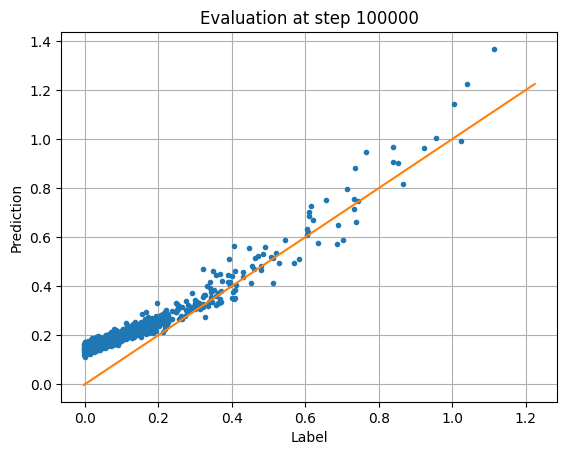

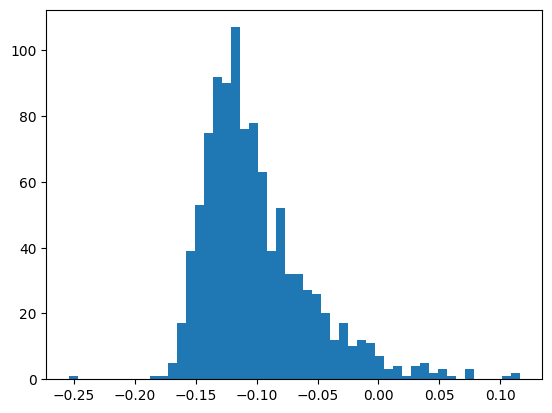

In [10]:
with tf.Session(graph=g) as ses:
    ses.run(tf.local_variables_initializer())
    ses.run(tf.global_variables_initializer())
    ckpt=tf.train.latest_checkpoint(args.log_dir)
    if ckpt:
        print("Loading checkpint: %s" % (ckpt))
        tf.logging.info("Loading checkpint: %s" % (ckpt))
        saver.restore(ses, ckpt)
    
    label_py=[]
    predictions_py=[]
    for i in range(16):
        val_label_py, val_predictions_py, step = ses.run( [labels,predictions, global_step] )
        label_py.append(val_label_py)
        predictions_py.append(val_predictions_py)
    label_py = np.concatenate(label_py,axis=0)
    predictions_py = np.concatenate(predictions_py,axis=0)
    print(label_py.shape)
    print('{} step: {} mse: {} R**2: {} Pearson: {}'.format(
        str(datetime.datetime.now()),
        step,
        np.mean((label_py-predictions_py)**2),
        #np.max(np.abs(test_error)),
        gnn.fitquality(label_py,predictions_py),
        np.corrcoef(label_py,predictions_py, rowvar=False)[0,1] ), flush=True ) 
    plt.figure()
    plt.plot(label_py,predictions_py,'.')
    gnn.line_1(label_py, label_py)
    plt.grid('on')
    plt.xlabel('Label')
    plt.ylabel('Prediction')
    plt.title('Evaluation at step {}'.format(step))
    fig_path = os.path.join(args.log_dir,'eval-{0:08}.png'.format(step) )
    fig_path = 'eval.pdf'.format(step)
    plt.show()
    plt.close()
    plt.figure()
    plt.hist(label_py-predictions_py, 50)
    fig_path = 'rez_hist.pdf'
    plt.show()
    plt.close()

 ## Message passing
W grafowych sieciach neuronowych GNN. Celem modelu jest przyjęcie reprezentacji grafu przechowującej informacje o pojedynczych wierzchołkach (i/lub krawędziach) a następnie wyprodukowanie reprezentacji umożliwiającej odczytanie kontekstu tego wierzchołka (i/lub krawędzi) w grafie poprzez utworzenie odpowiedniego zanurzenia (embedding).

![image](images/node_edge_embeddings.png)

Proces otrzymywania tego zanurzenia odbywa się przez algorytm tzw. "message passing"  gdzie odpowiednia funkcja  update  na danym wierzchołku używa informacji o zanurzeniach bezpośrednich sąsiadów wierzchołka oraz stanu zanurzenia bierzącego wierzchołka do wyliczenia nowej wartości zanurzenia
![image](images/message_passing.png) 

## Message
W naszej wersji programu zmodyfikowaliśmy zawartość zanurzenia węzła by poza domyślnymi wartościami związanymi z teorią kolejkowania i opisującą ruch na węzłach, posiadała ona flagę charakteryzującą jeden określony węzeł. Ta flaga jest ustawiona na 1 jeżeli węzeł jest węzłem na którym badamy opóźnienie w sieci oraz zero w każdym innym przypadku.

In [ ]:
def graph_features(x,e,first,second, flag):
    global REUSE

    flag = tf.expand_dims(flag, axis = 1)
    
    h=tf.pad(x,[[0,0],[0,N_PAD-1]])
    h = tf.concat([h, flag], axis = 1)
    c = tf.zeros((N_H,)) # used only in LSTM

    #bs = tf.shape(x)[0]
    #h=tf.random_gamma((bs,N_H),2,2)
    #initializer =tf.truncated_normal_initializer(0.0, 0.2)
    initializer =tf.contrib.layers.xavier_initializer()
    for i in range(N_PAS):
        with tf.variable_scope('features',
        reuse=REUSE, 
        initializer=initializer,
        #regularizer=tf.contrib.layers.l2_regularizer(0.00000000001)
        ) as scope:
            to_stack=[
                #tf.gather(x,first),
                tf.gather(h,first),
                e,
                tf.gather(h,second),
                #tf.gather(x,second),
            ]
            
            m=M(tf.gather(h,first),e)
            #Suma wplywajacych do wezla
            #czemu to dziala ?
            #m = tf.segment_sum(m,first) 
            #TODO wyjasnic
            #TODO num_segments jako cecha
            
            num_segments=tf.cast(tf.reduce_max(second)+1,tf.int32)
            m = tf.unsorted_segment_sum(m,second,num_segments)
            h, c = U(h, m, x, flag, c)

            REUSE=True
        

    return R(h,x)

In [ ]:
def make_batch(serialized_batch):
    bs = tf.shape(serialized_batch)[0]

    to=tf.TensorArray(tf.float32,size=bs)
    labelto=tf.TensorArray(tf.float32,size=bs)

    condition = lambda i,a1,a2: i < bs
    def body(i,to,lto):
        with tf.device("/cpu:0"):
            #Wypakowanie przykladu1
            with tf.name_scope('load'):    
                features = tf.parse_single_example(
                serialized_batch[i],
                features={
                    'mu': tf.VarLenFeature(tf.float32),
                    "Lambda": tf.VarLenFeature( tf.float32),
                    "W":tf.FixedLenFeature([],tf.float32),
                    "R":tf.VarLenFeature(tf.float32),
                    "first":tf.VarLenFeature(tf.int64),
                    "second":tf.VarLenFeature(tf.int64),
                    "flag": tf.VarLenFeature(tf.float32)})

                ar=[(tf.sparse_tensor_to_dense(features['mu'])-args.mu_shift)/args.mu_scale,
                        (tf.sparse_tensor_to_dense(features['Lambda']))]
                x=tf.stack(ar,axis=1)

                e=tf.sparse_tensor_to_dense(features['R'])
                # cecha jest od 0-1
                #e = (tf.expand_dims(e,axis=1)-0.24)/0.09
                e = tf.expand_dims(e,axis=1)

                first=tf.sparse_tensor_to_dense(features['first'])
                second=tf.sparse_tensor_to_dense(features['second'])
                flag = tf.sparse_tensor_to_dense(features['flag'])
            
        g_feature = graph_features(x,e,first,second, flag) 
        W = (features['W']-args.W_shift)/args.W_scale # 0.7-0.9

        return i+1,to.write(i,g_feature ),lto.write(i,W)
    
    with tf.control_dependencies([serialized_batch]):
        _,batch,labelst = tf.while_loop(condition,body,[tf.constant(0),to,labelto])
        batch = batch.stack()
        labels = labelst.stack()
        labels = tf.reshape(labels,[bs,1])
    return batch, labels


update

# Rodzaje rekurencyjnych sieci neuronowych(RNN)

## Prosta sieć neuronowa (Vanilla)
![image](images/rnn_diagram.webp)  
*Praveen Raj, Medium.com*

* Najprostsze obliczeniowo podejście
* Stosowanie **backpropagation** analogiczne jak w klasycznych sieciach neuronowych
* Podatne na **exploding gradient** i **vanishing gradient**
    * 1,1^50 ~= 117
    * 0,9^50 ~= 0,005

In [ ]:
N_H = args.pad + 2

def U_RNN(h, m, x, flag, c):
        with tf.variable_scope('update'):
            # na wejście warstwy wchodzi suma stanu ukrytego (h) i wiadomości (m)
            hm = h + m
            # ustawienie ostatinego elementu tensora na warość flagi identyfikującej wierzchołek
            hm = tf.concat([hm[:, :-1], flag], axis = 1)
            # pojedynczy perceptron z aktywacją ReLU
            u = tf.layers.dense(hm, N_H, activation = tf.nn.relu)
            # nowy stan ukryty (u) - update
            return u, c

## Long short-term memory (LSTM)

![image](images/LSTM_Cell.svg.png)  
*Wikimedia Commons*

* Dobrze radzi sobie z długofalowymi (wiele kroków) relacjami
* Złagodzenie problemu vaniching gradient
* Istnieją warianty dwukierunkowe, przydatne w problemach w których można wnioskować z poprzednich i następujących danych
* Duża ilość prametrów i operacji
    * wymaga więcej mocy obliczeniowej
    * podatne na overfitting
* Trudność w interpretacji

In [ ]:
def U_LSTM(h, m, x, flag, c):
        with tf.variable_scope('update'):
            bf = tf.get_variable(name='bf', shape=(N_H,), dtype=tf.float32)
            wf = tf.get_variable(name='wf', shape=(N_H, N_H), dtype=tf.float32)
            uf = tf.get_variable(name='uf', shape=(N_H, N_H), dtype=tf.float32)
            bi = tf.get_variable(name='bi', shape=(N_H,), dtype=tf.float32)
            wi = tf.get_variable(name='wi', shape=(N_H, N_H), dtype=tf.float32)
            ui = tf.get_variable(name='ui', shape=(N_H, N_H), dtype=tf.float32)
            bo = tf.get_variable(name='bo', shape=(N_H,), dtype=tf.float32)
            wo = tf.get_variable(name='wo', shape=(N_H, N_H), dtype=tf.float32)
            uo = tf.get_variable(name='uo', shape=(N_H, N_H), dtype=tf.float32)
            bc = tf.get_variable(name='bc', shape=(N_H,), dtype=tf.float32)
            wc = tf.get_variable(name='wc', shape=(N_H, N_H), dtype=tf.float32)
            uc = tf.get_variable(name='uc', shape=(N_H, N_H), dtype=tf.float32)

            # ustawienie ostatinego elementu tensora na warość flagi identyfikującej wierzchołek
            h = tf.concat([h[:, :-1], flag], axis = 1)

            # forget gate
            ft = tf.nn.sigmoid(tf.matmul(m, wf) + tf.matmul(h, uf) + bf)
            # input gate
            it = tf.nn.sigmoid(tf.matmul(m, wi) + tf.matmul(h, ui) + bi)
            # output gate
            ot = tf.nn.sigmoid(tf.matmul(m, wo) + tf.matmul(h, uo) + bo)
            # potencjalny kandydat (c~)
            c_tylda = tf.nn.tanh(tf.matmul(m, wc) + tf.matmul(h, uc) + bc)
            # nowy kandydat (c) - stary * forget gate + potencjalny * input gate
            c = tf.math.multiply(ft, c) + tf.math.multiply(it, c_tylda)
            # stan ukryty/update (u) = kandydat (c) * output gate
            u = tf.math.multiply(ot, tf.nn.tanh(c))
            return u, c

## Gated Reccurent Unit (GRU)
![image](images/Gated_Recurrent_Unit,_base_type.svg.png)

* mniej złożona od LSTM (3 operacje maierzowe i 1 *element-wise* do 4 operacji macierzowyc i 2 *element-wise*)
    * szybsze uczenie modelu
    * mniej podatne na overfitting
* dobrze radzi sobi z problemem vanishing gradient
* może radzić sobie gorzej z długofalowymi zależnościami
* w wielu praktycznych zastowoniach osiąga wyniki porównywalne z LSTM, niekiedy lepsze

In [ ]:
def U_GRU(h, m, x, flag, c):
    with tf.variable_scope('update'):
        wz=tf.get_variable(name='wz',shape=(N_H,N_H),dtype=tf.float32)
        uz=tf.get_variable(name='uz',shape=(N_H,N_H),dtype=tf.float32)
        wr=tf.get_variable(name='wr',shape=(N_H,N_H),dtype=tf.float32)
        ur=tf.get_variable(name='ur',shape=(N_H,N_H),dtype=tf.float32)
        W=tf.get_variable(name='W',shape=(N_H,N_H),dtype=tf.float32)
        U=tf.get_variable(name='U',shape=(N_H,N_H),dtype=tf.float32)

        # ustawienie ostatinego elementu tensora na warość flagi identyfikującej wierzchołek
        h = tf.concat([h[:, :-1], flag], axis = 1)
        # update gate
        z = tf.nn.sigmoid(tf.matmul(m,wz) + tf.matmul(h,uz))
        # reset gate
        r = tf.nn.sigmoid(tf.matmul(m,wr) + tf.matmul(h,ur))
        # candidate hidden state (h~)
        h_tylda = tf.nn.tanh(tf.matmul(m,W) + tf.matmul(r*h,U) )
        # final fidden state/update (u)
        u = (1.0-z)*h + z*h_tylda
        return u, c

## Porównanie
#### 2000 kroków
![img](images/2k_eval.png)
![img](images/2k_plot.png)
#### 8000 kroków
![img](images/8k_eval.png)
![img](images/8k_plot.png)
#### 20 000 kroków
![img](images/20k_eval.png)
![img](images/20k_plot.png)
#### Czas ucznia dla 20000 kroków
* RNN - 19:38
* GRU - 29:34
* LSTM 35:32

## Readout
Funkcja readout  R(h,x)  jest odpowiedzialna za interpretację otrzymanych wyników. Przyjmuje ona zanurzenia wierzchołków grafów $h$ połączone z informacjami o wierzchołkach $\mu$ - $\frac{1}{\text{czas obsługi}}$ i $\lambda$ - średni efektywny czas przybywania (average effective arrival rate). Te informacje są wykorzystywane do wytrenowania nowej sieci neuronowej typu Multi Layer Perceptron gdzie ostateczny wynik jest liczony jako suma wartości wyjściowych.
![image](images/GNN_readout.drawio.svg)

In [ ]:
def R(h,x):
    with tf.variable_scope('readout'):
        hx=tf.concat([h,x],axis=1)
        i = tf.layers.dense(hx,args.rn,activation=tf.nn.tanh)
        i = tf.layers.dense(i,args.rn)
        j = tf.layers.dense(h,args.rn,activation=tf.nn.selu)
        j = tf.layers.dense(j,args.rn)

        RR = tf.nn.sigmoid(i)
        RR = tf.multiply(RR,j)

        return tf.reduce_sum(RR,axis=0)

### Źródła
-  Krzysztof Rusek and Piotr Chołda, ''Message-Passing Neural Networks Learn Little's Law'', IEEE Communications Letters, 2018
-   Machine Learning in Networking 2024  Lectures, Piotr Chołda
-  A. Pearce, E. Reif, B. Sanchez-Lengeling, A. B. Wiltschko;  A Gentle Introduction to Graph Neural Networks , distill.pub